# Titanic Machine Learning Tutorial

## Introduction

In this notebook, I will follow a step-by-step process to solve the Titanic survival prediction problem using machine learning techniques.

---

## 1. Loading and Exploring the Data

First, I load the training data (`train.csv`) and test data (`test.csv`) provided by Kaggle.  
We can take a quick look at the first few rows to understand the structure and available features.

We will also check the size of the datasets (number of passengers and columns) and get a basic summary of the data.

Next, we will explore the data to identify any missing values and understand key relationships that might influence survival.


In [1]:
#Library insertion
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sns       
import pandas as pd


In [2]:
# Data load
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# To check if everything went good
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding the Data with Basic Pandas Functions

To better understand our dataset, Ι used the following functions:

---

### 1. `info()`

This gives  a summary of:
- The number of rows and columns.
- The data types of each column (e.g., numeric, categorical).
- How many **non-null** values each column contains.
- The total memory usage of the dataset.

From this, Ι discovered that some columns, like `Age` and `Cabin`, have quite a few missing values.

---

### 2. `isnull().sum()`

This function counts how many missing values are in each column.

I found that:
- There are 177 missing values in `Age`
- 687 missing values in `Cabin`
- 2 missing values in `Embarked`

---

### 3. `describe()`

This gives basic statistics for the numeric columns, such as:
- Number of non-missing values (`count`)
- Mean (`mean`)
- Standard deviation (`std`)
- Minimum (`min`) and maximum (`max`)
- Quartile values (25%, 50% (median), 75%)

These statistics help understand the distribution and spread of our data.

---

With this information, we have a clear picture of which data needs cleaning or filling before proceeding with analysis and modeling.


In [3]:
train_df.info()
train_df.describe()

#Checking the information we are provided from the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.isnull().sum() #checking the missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Creating Graphs so that I can study the distribution of the data.

---

### 1. ` Survival countplot `
The dataset shows that approximately 500 passengers did not survive, while around 350 passengers survived. This indicates that the classes are somewhat imbalanced, with more non-survivors than survivors. This imbalance is important to consider during modeling, as it may affect the performance of classifiers, potentially biasing predictions toward the majority class. Techniques such as resampling or using evaluation metrics suitable for imbalanced data might be needed to address this.


--- 

### 2. `Gender countplot`

There are nearly 600 male passengers and around 300 female passengers in the dataset. This shows that males constitute roughly twice the number of females. Such an imbalance is important to consider, especially since gender might have a strong influence on survival rates, as historical data suggests women had higher chances of survival on the Titanic. Later analysis should examine survival rates separately by gender to capture these differences.

---

### 3. `Age Distribution`
The age distribution shows a noticeable peak for very young children (ages 0–10), with a frequency around 15–30. After age 10, the distribution becomes more continuous and roughly bell-shaped, peaking among passengers aged around 20–30. As age increases, the number of passengers gradually decreases, forming a pyramid-like shape. Very few passengers are in the older age groups (70–80).

This suggests that the Titanic passenger list included a considerable number of young children, which is visible as a small but clear peak at the start of the distribution.
Most passengers were young adults in their twenties and thirties, which is typical for the period.
The gradual decline in frequency with increasing age shows that fewer older passengers were on board.
The presence of very few elderly passengers might reflect social and economic factors of the time or the demographics of those who could afford to travel.

It’s also important to consider that age data is missing for some passengers, so this plot only reflects those whose ages were recorded.

---


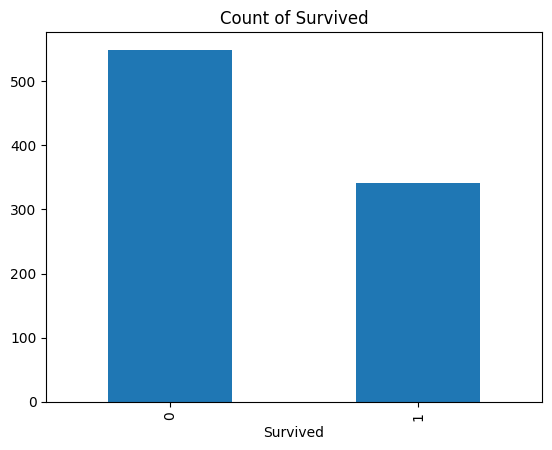

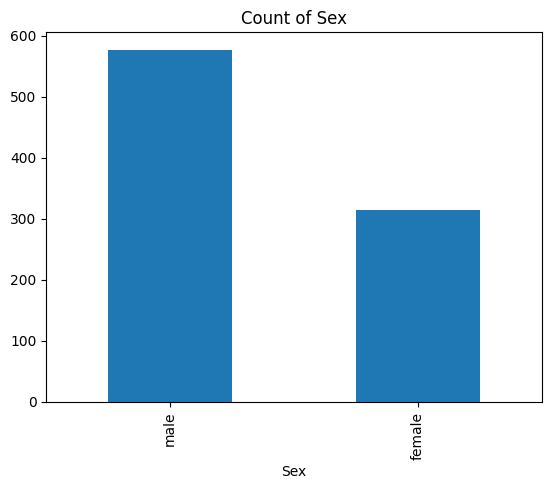

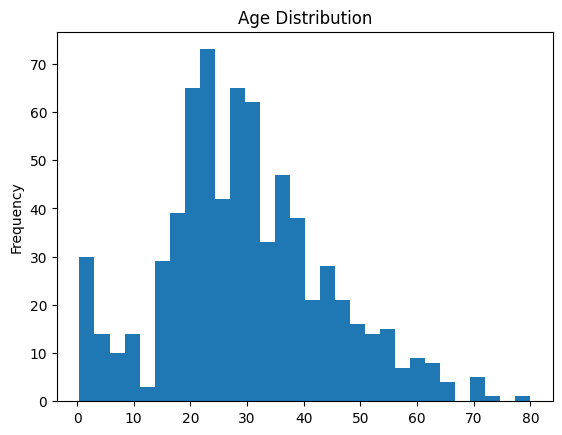

In [5]:
train_df['Survived'].value_counts().plot(kind='bar', title='Count of Survived')
plt.show()

train_df['Sex'].value_counts().plot(kind='bar', title='Count of Sex')
plt.show()

train_df['Age'].dropna().plot(kind='hist', bins=30, title='Age Distribution')
plt.show()


## Analyzing Survival Rates by Passenger Class

---

### In this step, I group the dataset by Pclass and calculate the mean of the Survived column.


This analysis helps us understand how passenger class affected survival chances.

The output shows that:

First class passengers had the highest survival rate (about 63%)

Second class passengers had a moderate survival rate (around 47%)

Third class passengers had the lowest survival rate (about 24%)

These results highlight a clear pattern: higher passenger classes had significantly better chances of survival.

--- 



In [6]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Analyzing Survival Rates by Gender

---

### In this step, we group the dataset by the Sex column and calculate the mean of the Survived column.

The output shows that:

About 74% of female passengers survived

Only around 19% of male passengers survived

These numbers clearly show that women had a much higher survival rate compared to men.
This likely reflects evacuation priorities at the time, following the “women and children first” principle during the Titanic disaster.

--- 



In [7]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


##  Handling missing values

Before building our model, it's important to handle missing data properly.  
In this step, we'll do the following:

- For the `Age` column, we'll fill missing values with the median age.  
  Median is chosen instead of mean because it is less sensitive to extreme values.
- For the `Embarked` column, we'll fill missing values with the most frequent port (mode).
- The `Cabin` column has too many missing values to be useful.
  To keep the code robust, we will drop the `Cabin` column but use `errors='ignore'` so the code won't break if the column is already missing from the dataset.

This approach keeps the data clean and avoids future warnings or errors.



In [8]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df = train_df.drop('Cabin', axis=1, errors='ignore')
print("all good")


all good


## Correlation Insight

In our heatmap, we observed a moderate negative correlation (-0.55) between *Fare* and *Pclass*.  
This means that as the passenger class number increases (from 1st to 3rd class), the average fare tends to decrease — which makes sense given ticket pricing.

While this correlation isn't extreme, it's worth noting because it could introduce multicollinearity in linear models.  
For tree-based models, this correlation is usually less problematic.  
To handle it, we could either keep both features and let the model decide, remove one of them, or create a new combined feature.


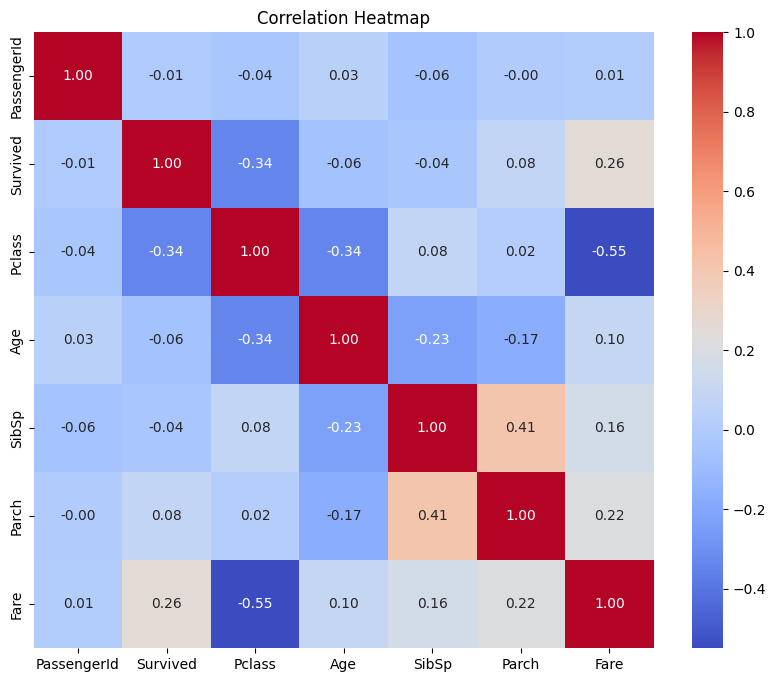

In [9]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

corr = train_df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Titanic Data Preprocessing & Feature Engineering 

This process transforms raw Titanic data into a structured format ready for modeling:

 **Missing value handling:(I did it again because the code did not run else.)**

* Imputed missing `Age` values with the dataset's median to maintain consistency.
* Filled missing `Embarked` entries with the mode (most common value) to preserve category information.
* Dropped the `Cabin` column due to a high proportion of missing data.

 **Feature engineering:**

* Added `FamilySize` as the sum of siblings/spouses and parents/children aboard plus one, highlighting family context.
* Extracted `Title` from passenger names, regrouped rare titles under 'Rare', and standardized similar titles (e.g., 'Mlle' and 'Ms' to 'Miss').

 **Age binning:**

* Divided `Age` into categorical bins (`AgeBin`) to capture age-related patterns that may be non-linear.

 **Encoding:**

* Performed one-hot encoding on categorical variables (`Sex`, `Embarked`, `Title`, `AgeBin`), transforming them into numerical features suitable for machine learning models.



In [10]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_df = pd.read_csv('/kaggle/input/titanic/train.csv')


# Fill missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df = train_df.drop('Cabin', axis=1, errors='ignore')

# Feature engineering
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['Age_Pclass'] = train_df['Age'] * train_df['Pclass']


# Create 'Title' before dropping 'Name'
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Age bins
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=False)

# Drop columns we don't need anymore
train_df = train_df.drop(['Name', 'Ticket'], axis=1)

# One-hot encoding
categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeBin']
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

print("all good")

all good


##  Random Forest Modeling & Hyperparameter Tuning 

 **Data split:**

* Separated features (`X`) from the target (`y`), then split the data into training and validation sets (80% training, 20% validation) for unbiased evaluation.

 **Model selection:**

* Used `RandomForestClassifier` as the base estimator for its ability to handle nonlinear relationships and feature importance.

 **Hyperparameter tuning:**

* Defined a `param_grid` with combinations of hyperparameters:

  * `n_estimators`: number of trees (e.g., 100, 200)
  * `max_depth`: maximum depth of each tree
  * `min_samples_split` and `min_samples_leaf`: control overfitting by specifying minimum samples required for splits and leaves
* Applied `GridSearchCV` with 5-fold cross-validation to search for the best hyperparameter combination based on accuracy.

 **Evaluation:**

* Predicted on the validation set and calculated accuracy to measure model performance.
* Displayed the best hyperparameters and final accuracy.

 **Model saving:**

* Saved the optimized model as `best_model.pkl` using `pickle` for future use without retraining.



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


X = train_df_encoded.drop('Survived', axis=1)
y = train_df_encoded['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Validation Accuracy: {accuracy:.4f}")

import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Validation Accuracy: 0.8380


##  Test Set Preprocessing for Titanic Prediction

We perform identical preprocessing and feature engineering procedures on the test dataset as applied to the training dataset to ensure consistency in model input representation and to prevent discrepancies or errors during model inference.


In [12]:
import pandas as pd
import pickle

test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Fill missing values
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

if 'Embarked' in test_df.columns:
    test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
else:
    test_df['Embarked'] = 'S'

test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['Age_Pclass'] = test_df['Age'] * test_df['Pclass']


test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Title'].replace(
    ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 
     'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

test_df['AgeBin'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=False)

test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeBin']
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)




## Generating Predictions and Creating Submission File
We are now prepared for the final stage, where predictions will be made. More specifically:


1. **Loading the trained model**  
   The previously saved model is loaded from a pickle file (`best_model.pkl`).

2. **Matching test features with model features**  
   - The model’s expected input features are retrieved using `feature_names_in_`.  
   - Some features might be missing from the test dataset after encoding, so these missing columns are added with default values of 0 to ensure the test data has exactly the same columns as the model expects.

3. **Preparing the test feature matrix**  
   The test dataframe is reordered and filtered so that it contains only the features in the exact order required by the model.

4. **Making predictions**  
   The model predicts survival for each passenger in the test set.

5. **Creating the submission dataframe**  
   A new dataframe is created with two columns:  
   - `PassengerId`: IDs from the original test set  
   - `Survived`: the predicted labels (0 or 1) for survival

6. **Saving the submission to a CSV file**  
   The submission dataframe is saved to `random_forest_submission.csv` without the index, ready to be uploaded to Kaggle.

7. **Confirmation message**  
   Prints a message indicating that the submission file was saved successfully.


In [13]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

features = best_model.feature_names_in_

missing_cols = set(features) - set(test_df_encoded.columns)
for c in missing_cols:
    test_df_encoded[c] = 0

X_test = test_df_encoded[features]
# Predict
preds = best_model.predict(X_test)

# Submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': preds
})
submission.to_csv('random_forest_submission.csv', index=False)

print("Submission file saved successfully!")


Submission file saved successfully!
